Лабораторная работа №1. Логистическая регрессия в качестве нейронной сети
====

Данные: В работе предлагается использовать набор данных notMNIST, который состоит из изображений размерностью 28×28 первых 10 букв латинского алфавита (A … J, соответственно). Обучающая выборка содержит порядка 500 тыс. изображений, а тестовая – около 19 тыс.

In [10]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from matplotlib import pyplot as plt

from utils import display_images, remove_duplicates, train, plot_accuracy

#### Загружаем данные

In [11]:
input_data = pd.read_csv('notmnist_test.csv')

In [12]:
input_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,labels
0,0,0,1,0,0,0,0,0,0,0,...,188,149,108,54,6,0,0,2,3,E
1,1,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,254,255,202,E
2,2,0,5,0,146,255,250,255,255,255,...,255,255,255,255,254,255,39,0,2,E
3,3,0,61,255,255,254,255,255,255,255,...,255,255,255,255,254,254,255,63,0,E
4,4,58,243,255,254,255,255,255,254,251,...,255,255,255,253,255,120,0,3,0,E


In [13]:
X = input_data.iloc[:, 1:785].to_numpy()
labels = input_data['labels'].to_numpy()
y = labels

#### Разделим данные на обучающую и контрольную

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=labels)

#### Отобразим нельсколько картинок из исходных данных

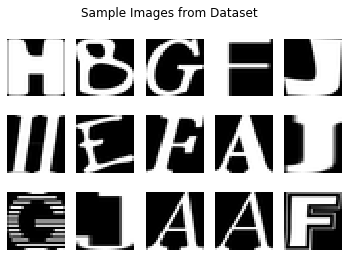

In [15]:
display_images(X_train)

#### Проверим, что классы являются сбалансированны

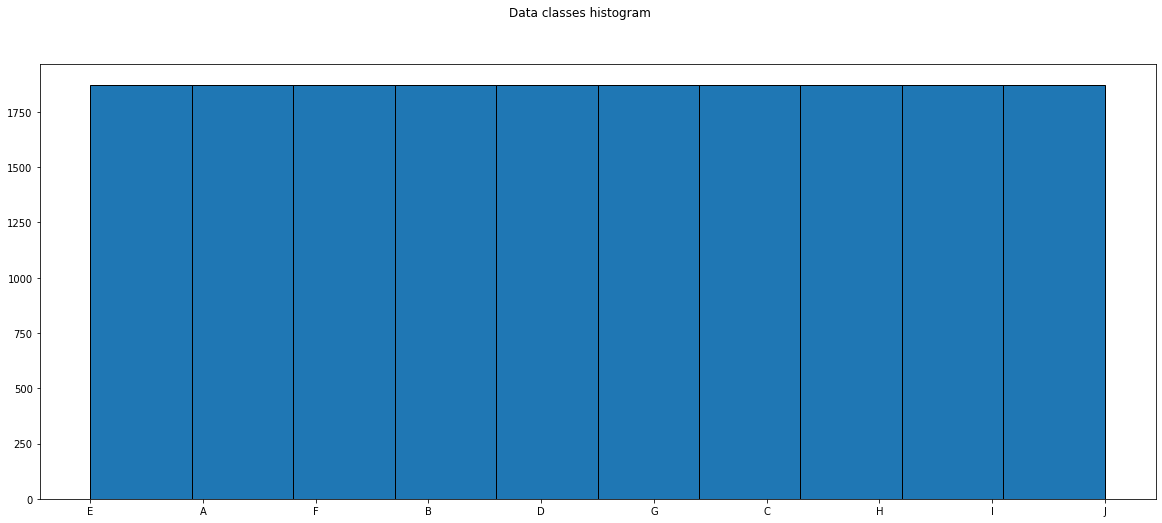

In [16]:
plt.figure(figsize=(20, 8))
plt.suptitle('Data classes histogram')
res = plt.hist(labels, bins=10, ec='black')
plt.show()

#### Уберем дубликаты из обучающей выборки

In [17]:
X, y = remove_duplicates(X_train, y_train, X_test, y_test)

In [18]:
print(f'Removed {X_train.shape[0] - X.shape[0]} duplicates')

Removed 268 duplicates


#### Построим простейший классификатор с помощью логистической регрессии

In [19]:
score = train(X, y, X_test, y_test)
print("Test score with L1 penalty: %.4f" % score)

Test score with L1 penalty: 0.8470


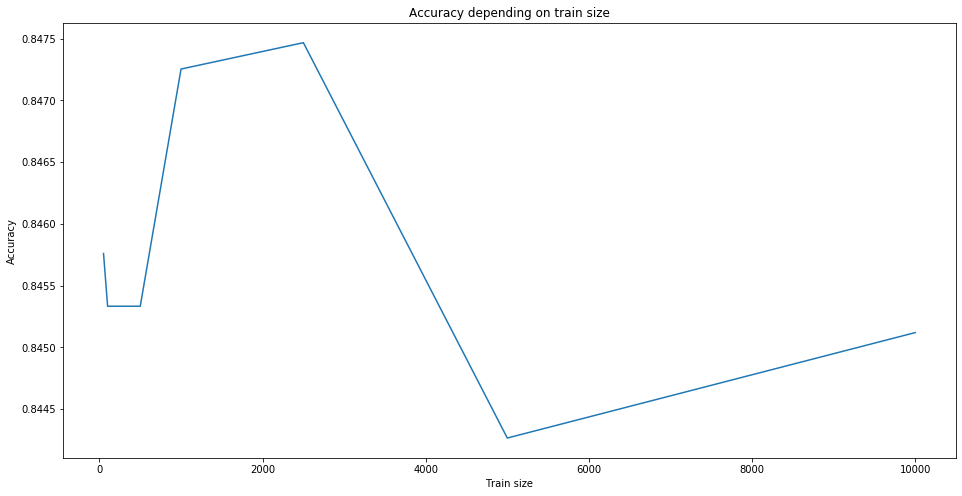

In [20]:
plot_accuracy(X, y, X_test, y_test)

## Вывод

В данной лабораторной работе был построен простейший классификатор использую набор данных notMNIST